In [114]:
import pandas as pd

In [115]:
df=pd.read_csv('G:/내 드라이브/PROJECT/csv/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [116]:
df = df.drop(columns=['customer_id'])

In [117]:
# 신용등급에 따라 신용점수 구간 나누기
bins=[300,600,660,720,780,850]
labels=['Very poor','Poor','Fair','Good','Excellent']

In [118]:
df['section of credit_score'] = pd.cut(
    df['credit_score'], bins=bins, labels=labels,right=True)

In [119]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,section of credit_score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Poor
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Poor
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Very poor
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Fair
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [120]:
df.insert(df.columns.get_loc('credit_score') + 1,
              'section of credit_score',
              df.pop('section of credit_score'))
df

,credit_score,section of credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Poor,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Very poor,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Fair,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Very poor,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Fair,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Good,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [121]:
df['section of credit_score'].value_counts()

section of credit_score
Very poor    3066
Poor         2281
Fair         2245
Good         1458
Excellent     950
Name: count, dtype: int64

In [122]:
# 나이대에 따라 나이 나누어서 새로운 변수 만들기
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99]  # 각 구간의 경계값
labels = ['teenager', 'twenties', 'thirties', 'forties', 'fifties', 'sixties','seventies','eighties','nineties']  # 각 구간의 레이블

In [123]:
df['age_group'] = pd.cut(
    df['age'], bins=bins, labels=labels,right=True)
df

,credit_score,section of credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group
0,619,Poor,France,Female,42,2,0.00,1,1,1,101348.88,1,forties
1,608,Poor,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,forties
2,502,Very poor,France,Female,42,8,159660.80,3,1,0,113931.57,1,forties
3,699,Fair,France,Female,39,1,0.00,2,0,0,93826.63,0,thirties
4,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,forties
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,5,0.00,2,1,0,96270.64,0,thirties
9996,516,Very poor,France,Male,35,10,57369.61,1,1,1,101699.77,0,thirties
9997,709,Fair,France,Female,36,7,0.00,1,0,1,42085.58,1,thirties
9998,772,Good,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,forties


In [124]:
df.insert(df.columns.get_loc('age') + 1,
              'age_group',
              df.pop('age_group'))
df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,Female,42,forties,2,0.00,1,1,1,101348.88,1
1,608,Poor,Spain,Female,41,forties,1,83807.86,1,0,1,112542.58,0
2,502,Very poor,France,Female,42,forties,8,159660.80,3,1,0,113931.57,1
3,699,Fair,France,Female,39,thirties,1,0.00,2,0,0,93826.63,0
4,850,Excellent,Spain,Female,43,forties,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,thirties,5,0.00,2,1,0,96270.64,0
9996,516,Very poor,France,Male,35,thirties,10,57369.61,1,1,1,101699.77,0
9997,709,Fair,France,Female,36,thirties,7,0.00,1,0,1,42085.58,1
9998,772,Good,Germany,Male,42,forties,3,75075.31,2,1,0,92888.52,1


In [125]:
# 우선 데이터의 상한선을 찾아 어디서부터 이상치로 판별할 수 있는지 알아본다

print(df['age'].max())

import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['age'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
upper_bound = Q3 + 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"상한선: {upper_bound}")

# 상한선 초과 데이터 확인
outliers_above = [x for x in df['age'] if x > upper_bound]
print(f"상한선 초과 데이터: {outliers_above}")

# 상한선을 넘긴 하지만 범위를 지나치게 벗어나지 않음
# 이상치로 간주하지 않는다

92
1사분위수 (Q1): 32.0
3사분위수 (Q3): 44.0
IQR: 12.0
상한선: 62.0
상한선 초과 데이터: [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 67, 68, 73, 67, 64, 63, 92, 65, 75, 67, 71

In [126]:
import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['products_number'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
upper_bound = Q3 + 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"상한선: {upper_bound}")

# 상한선 초과 데이터 확인
outliers_above = [x for x in df['products_number'] if x > upper_bound]
print(f"상한선 초과 데이터: {outliers_above}")

1사분위수 (Q1): 1.0
3사분위수 (Q3): 2.0
IQR: 1.0
상한선: 3.5
상한선 초과 데이터: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [127]:
import numpy as np

# 데이터 정렬
data_sorted = np.sort(df['credit_score'])

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)

# IQR 계산
IQR = Q3 - Q1

# 상한선 계산
lower_bound = Q1 - 1.5 * IQR

print(f"1사분위수 (Q1): {Q1}")
print(f"3사분위수 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"하한선: {lower_bound}")

# 상한선 초과 데이터 확인
outliers_below = [x for x in df['credit_score'] if x < lower_bound]
print(f"하한선 미만 데이터: {outliers_below}")

1사분위수 (Q1): 584.0
3사분위수 (Q3): 718.0
IQR: 134.0
하한선: 383.0
하한선 미만 데이터: [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]


In [128]:
# 범위를 지나치게 벗어나는 값이 없다
# 모든 변수에 이상치가 없는 것으로 간주한다

In [129]:
df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,Female,42,forties,2,0.00,1,1,1,101348.88,1
1,608,Poor,Spain,Female,41,forties,1,83807.86,1,0,1,112542.58,0
2,502,Very poor,France,Female,42,forties,8,159660.80,3,1,0,113931.57,1
3,699,Fair,France,Female,39,thirties,1,0.00,2,0,0,93826.63,0
4,850,Excellent,Spain,Female,43,forties,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,thirties,5,0.00,2,1,0,96270.64,0
9996,516,Very poor,France,Male,35,thirties,10,57369.61,1,1,1,101699.77,0
9997,709,Fair,France,Female,36,thirties,7,0.00,1,0,1,42085.58,1
9998,772,Good,Germany,Male,42,forties,3,75075.31,2,1,0,92888.52,1


In [130]:
import pandas as pd

# 예제 데이터프레임 생성
# data = pd.DataFrame({
#     'age_group': ['10대', '20대', '20대', '30대', '30대', '10대', '40대'],
#     'churn': [1, 1, 0, 1, 0, 0, 1]
# })

# 나이대별로 그룹화하여 churn 값별 개수 계산
grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


C:\Users\acy\AppData\Local\Temp\ipykernel_8488\4177541361.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


In [131]:
grouped_counts

churn,0,1
age_group,,
teenager,46,3
twenties,1471,121
thirties,3873,473
forties,1812,806
fifties,382,487
sixties,243,132
seventies,122,14
eighties,12,1
nineties,2,0


In [132]:
df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
129845.26       1
117419.35       1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
150725.53       1
Name: count, Length: 6382, dtype: int64

In [133]:
# 잔액이 0=이탈, 이탈 아니다
# 잔액 여러가지=이탈, 이탈 아니다

grouped_counts2 = df.groupby('balance')['churn'].value_counts().unstack(fill_value=0)
grouped_counts2

churn,0,1
balance,,
0.00,3117,500
3768.69,0,1
12459.19,0,1
14262.80,1,0
16893.59,1,0
...,...,...
216109.88,0,1
221532.80,1,0
222267.63,0,1


In [134]:
# 잔액 0, 잔액 나머지 두 그룹으로 만들어서 새로운 변수 추가
# import pandas as pd
# import numpy as np

# 0.00이 아닌 값들을 한 그룹으로 묶기
# df['balance_group'] = np.where(df['balance'] == 0.00, '0.00', 'rest')


In [135]:
# 'A' 칼럼의 값이 0.00인 경우 'zero', 나머지 경우 'rest'로 설정
df['balance_group'] = df['balance'].apply(lambda x: 'zero' if x == 0.00 else 'rest')


In [136]:
df.insert(df.columns.get_loc('balance') + 1,
              'balance_group',
              df.pop('balance_group'))

In [137]:
df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,balance_group,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,Female,42,forties,2,0.00,zero,1,1,1,101348.88,1
1,608,Poor,Spain,Female,41,forties,1,83807.86,rest,1,0,1,112542.58,0
2,502,Very poor,France,Female,42,forties,8,159660.80,rest,3,1,0,113931.57,1
3,699,Fair,France,Female,39,thirties,1,0.00,zero,2,0,0,93826.63,0
4,850,Excellent,Spain,Female,43,forties,2,125510.82,rest,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,thirties,5,0.00,zero,2,1,0,96270.64,0
9996,516,Very poor,France,Male,35,thirties,10,57369.61,rest,1,1,1,101699.77,0
9997,709,Fair,France,Female,36,thirties,7,0.00,zero,1,0,1,42085.58,1
9998,772,Good,Germany,Male,42,forties,3,75075.31,rest,2,1,0,92888.52,1


In [138]:
# 위의 데이터프레임을 csv 파일로 저장
csv_filename = 'grouped_data.csv'
df.to_csv(csv_filename, index=False)

In [139]:
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)
grouped_counts3

churn,0,1
balance_group,,
rest,4846,1537
zero,3117,500


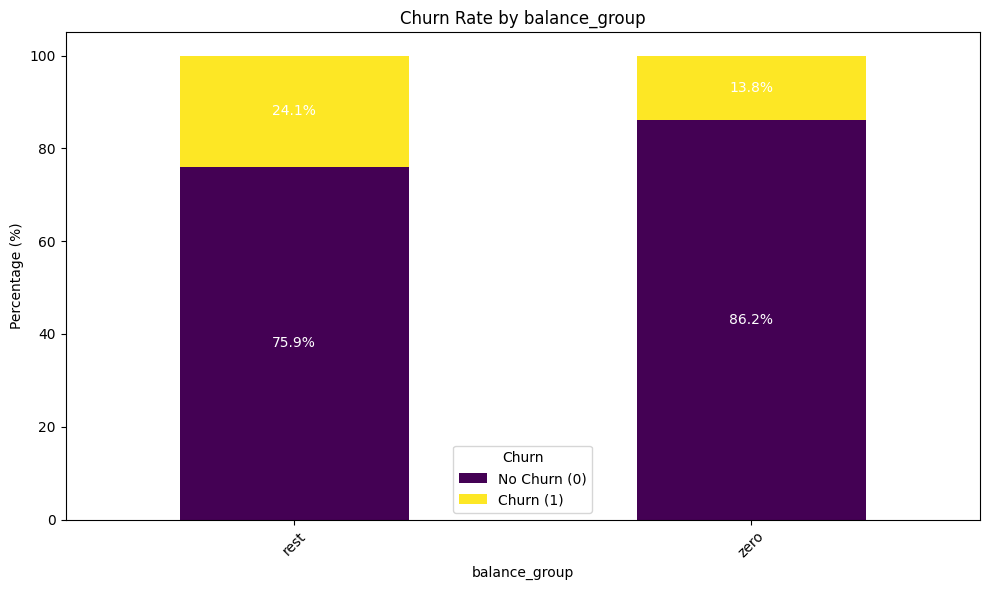

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage3 = grouped_counts3.div(grouped_counts3.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage3.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage3.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('balance_group')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by balance_group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
# 전체 이탈 비율 약 20, 잔액이 0인 것들 중에서 이탈 비율 약 14

# 만약 전체 이탈 비율이 14%보다 낮다면, 0인 값에서의 이탈 비율이 더 높으므로 0이 유의미할 수 있습니다.
# 반대로, 전체 이탈 비율이 14%보다 높다면, 0인 데이터에서의 이탈 비율이 더 낮아 0이 의미가 덜할 수 있습니다.

# 세분화 분석: 잔액이 0인 데이터가 특정 사용자 그룹(예: 가입 기간, 지역 등)에 편중되어 있는지 분석합니다.
# 특정 그룹에서 잔액이 0인 비율이 높은 경우, 그룹 특성에 따라 추가적인 분석이 필요할 수 있습니다.

In [142]:
# 전체 이탈 비율 구하기
import pandas as pd


# ㄱ 칼럼에서 각 데이터의 비율 계산
ratio = df['churn'].value_counts(normalize=True)

# 결과 출력 (백분율 형태로 보기 좋게 변환)
ratio_percentage = ratio * 100
print(ratio_percentage)


churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [143]:
df.dtypes

credit_score                  int64
section of credit_score    category
country                      object
gender                       object
age                           int64
age_group                  category
tenure                        int64
balance                     float64
balance_group                object
products_number               int64
credit_card                   int64
active_member                 int64
estimated_salary            float64
churn                         int64
dtype: object

In [144]:
# df['section of credit_score'] = df['section of credit_score'].astype('category')
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')
# df['age_group'] = df['age_group'].astype('category')
df['balance_group'] = df['balance_group'].astype('category')
df['credit_card'] = df['credit_card'].astype('category')
df['active_member'] = df['active_member'].astype('category')
df['churn'] = df['churn'].astype('category')

In [145]:
df.dtypes

credit_score                  int64
section of credit_score    category
country                    category
gender                     category
age                           int64
age_group                  category
tenure                        int64
balance                     float64
balance_group              category
products_number               int64
credit_card                category
active_member              category
estimated_salary            float64
churn                      category
dtype: object

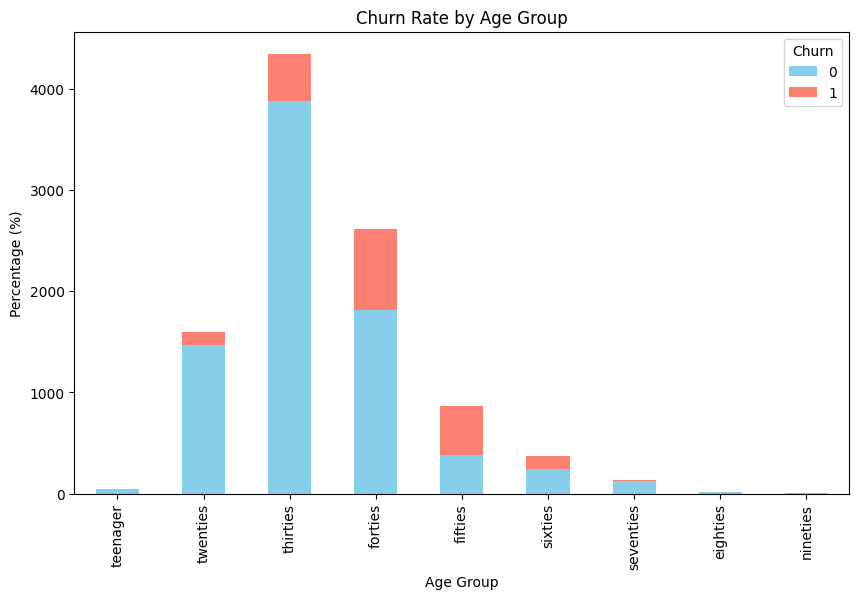

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# 비율을 플로팅
ax = grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# 플롯에 제목과 레이블 추가
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', labels=['0', '1'])

# 플롯 표시
plt.show()


C:\Users\acy\AppData\Local\Temp\ipykernel_8488\3940168431.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


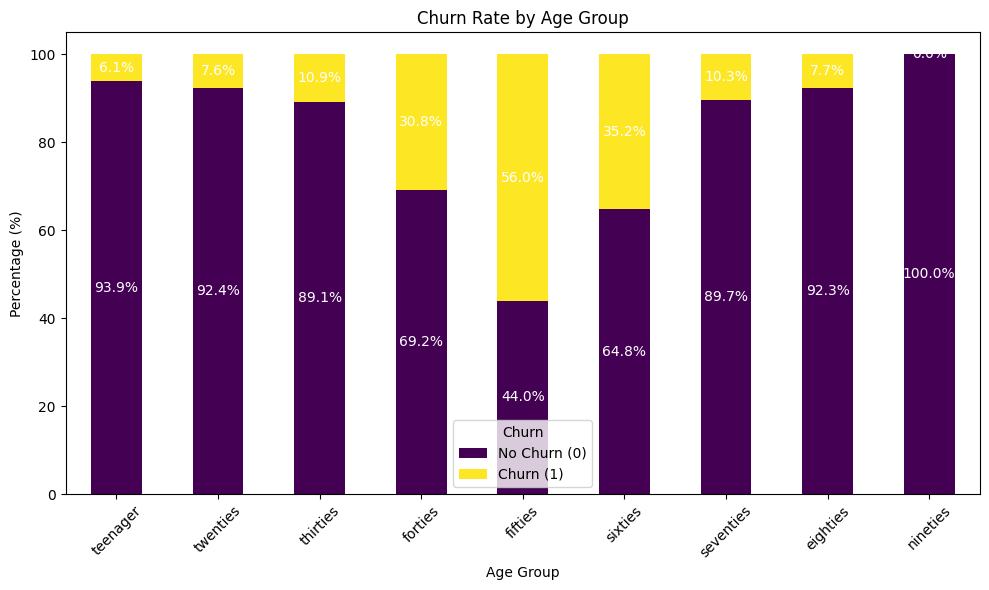

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by Age Group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [148]:
# 나이대별 평균 잔액, 최소 잔액, 최대 잔액, 총 잔액 계산
grouped = df.groupby('age_group')['balance'].agg(['mean', 'min', 'max', 'sum']).reset_index()

print(grouped)


   age_group           mean        min        max           sum
0   teenager   74393.861633       0.00  176139.50  3.645299e+06
1   twenties   73677.322902       0.00  214346.96  1.172943e+08
2   thirties   75071.796781       0.00  250898.09  3.262620e+08
3    forties   78479.240768       0.00  222267.63  2.054587e+08
4    fifties   83632.942486       0.00  238387.56  7.267703e+07
5    sixties   78058.302667       0.00  187013.13  2.927186e+07
6  seventies   70416.418235       0.00  186445.31  9.576633e+06
7   eighties   32730.885385       0.00  123356.63  4.255015e+05
8   nineties  123794.775000  121513.31  126076.24  2.475895e+05


C:\Users\acy\AppData\Local\Temp\ipykernel_8488\3839468755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_group')['balance'].agg(['mean', 'min', 'max', 'sum']).reset_index()


In [149]:
df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
129845.26       1
117419.35       1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
150725.53       1
Name: count, Length: 6382, dtype: int64

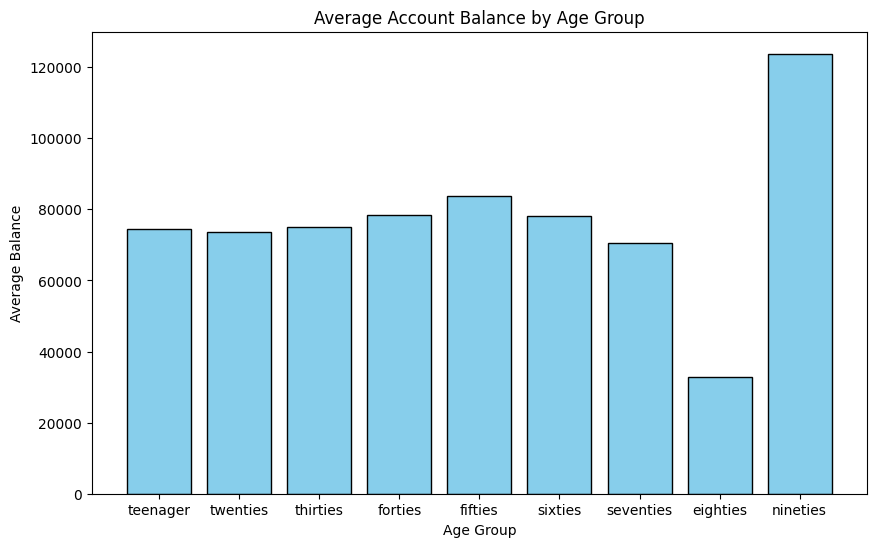

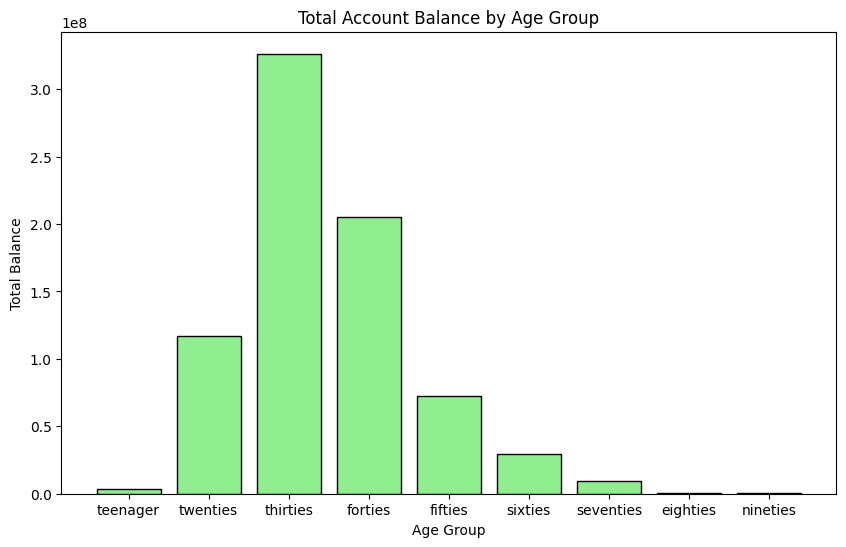

In [150]:
import matplotlib.pyplot as plt

# 나이대별 평균 잔액 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped['age_group'], grouped['mean'], color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.title('Average Account Balance by Age Group')
plt.show()

# 나이대별 총 잔액 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped['age_group'], grouped['sum'], color='lightgreen', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Total Balance')
plt.title('Total Account Balance by Age Group')
plt.show()


In [151]:
filtered_data = df[df['balance'] != 0.00]
filtered_data['balance'].value_counts()

balance
130170.82    2
105473.74    2
83199.05     1
129845.26    1
117419.35    1
            ..
88381.21     1
155060.41    1
57369.61     1
75075.31     1
133866.22    1
Name: count, Length: 6381, dtype: int64

In [152]:
print(filtered_data['balance'].mean())
print(filtered_data['balance'].median())
# 평균값이랑 중앙값이랑 별 차이가 안 난다

119827.49379288736
119839.69


In [153]:
df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,balance_group,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,Female,42,forties,2,0.00,zero,1,1,1,101348.88,1
1,608,Poor,Spain,Female,41,forties,1,83807.86,rest,1,0,1,112542.58,0
2,502,Very poor,France,Female,42,forties,8,159660.80,rest,3,1,0,113931.57,1
3,699,Fair,France,Female,39,thirties,1,0.00,zero,2,0,0,93826.63,0
4,850,Excellent,Spain,Female,43,forties,2,125510.82,rest,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,Male,39,thirties,5,0.00,zero,2,1,0,96270.64,0
9996,516,Very poor,France,Male,35,thirties,10,57369.61,rest,1,1,1,101699.77,0
9997,709,Fair,France,Female,36,thirties,7,0.00,zero,1,0,1,42085.58,1
9998,772,Good,Germany,Male,42,forties,3,75075.31,rest,2,1,0,92888.52,1


In [154]:
df.dtypes

credit_score                  int64
section of credit_score    category
country                    category
gender                     category
age                           int64
age_group                  category
tenure                        int64
balance                     float64
balance_group              category
products_number               int64
credit_card                category
active_member              category
estimated_salary            float64
churn                      category
dtype: object

In [164]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

# 예제 데이터프레임 생성
# data = {
#     'age': [23, 45, 34, 25, 32, 45, 54, 40, 38, 28],
#     'salary': [50000, 60000, 70000, 50000, 60000, 75000, 80000, 90000, 95000, 60000],
#     'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
#     'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male']
# }
# df = pd.DataFrame(data)

categorical_columns = df.select_dtypes(include=['category'])

# 범주형 변수 인코딩
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 엔트로피 계산 함수
def entropy(y):
    proportions = y.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# 정보 이득 계산 함수
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    feature_values = df[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# 각 칼럼에 대한 정보 이득 계산
target = 'churn'
for feature in df.columns:
    if feature != target:
        ig = information_gain(df, feature, target)
        # print(f'Information Gain of {feature} with respect to {target}: {ig}')
        print(f"'{feature}':{ig}")

'credit_score':0.038547012884779575
'section of credit_score':0.0006065068745300106
'country':0.020222322423849803
'gender':0.008154397807196179
'age':0.10721551580707478
'age_group':0.08887078499166601
'tenure':0.0010139452215386369
'balance':0.5194251097245063
'balance_group':0.011307710863572629
'products_number':0.10092156424028342
'credit_card':3.6636757529517894e-05
'active_member':0.01773286854203171
'estimated_salary':0.7292666572167683


In [166]:
info_gains={'credit_score':0.038547012884779575,
'section of credit_score':0.0006065068745300106,
'country':0.020222322423849803,
'gender':0.008154397807196179,
'age':0.10721551580707478,
'age_group':0.08887078499166601,
'tenure':0.0010139452215386369,
'balance':0.5194251097245063,
'balance_group':0.011307710863572629,
'products_number':0.10092156424028342,
'credit_card':3.6636757529517894e-05,
'active_member':0.01773286854203171,
'estimated_salary':0.7292666572167683}

# 값에 따라 정렬된 항목 생성
sorted_items = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)

# 정렬된 항목에서 키 값만 추출
sorted_keys = [item[0] for item in sorted_items]

# 결과 출력
print("Keys sorted by value in descending order:")
for key in sorted_keys:
    print(key)

Keys sorted by value in descending order:
estimated_salary
balance
age
products_number
age_group
credit_score
country
active_member
balance_group
gender
tenure
section of credit_score
credit_card


### **상관계수와 정보 이득의 차이**

1. **선형 vs. 비선형 관계**:
   - 상관계수는 주로 선형 관계를 측정합니다. 비선형 관계가 있는 경우 상관계수는 낮게 나올 수 있습니다.
   - 정보 이득은 비선형 관계와 상호작용을 더 잘 포착할 수 있습니다. 따라서 비선형 관계가 중요한 경우에도 높은 정보 이득을 가질 수 있습니다.

2. **엔트로피와 정보 이득**:
   - 정보 이득은 엔트로피를 기반으로 하여 특성이 타겟 변수의 불확실성을 얼마나 줄이는지를 측정합니다. 이로 인해 데이터의 분포에 대한 상세한 정보를 제공합니다.
   - 상관계수는 단순히 두 변수 간의 선형 관계를 측정하므로, 데이터의 분포나 비선형 관계를 반영하지 못할 수 있습니다.

### **예시: `estimated_salary`의 경우**

- **상관계수**: `estimated_salary`와 `churn` 간의 상관계수가 낮다면, 선형 관계가 약하다는 것을 의미합니다.
- **정보 이득**: 정보 이득이 높다면, `estimated_salary`가 `churn`의 분포를 설명하는 데 유용할 수 있습니다. 이는 `estimated_salary`가 `churn`의 분포를 구분짓는 데 중요한 역할을 할 수 있다는 것을 의미합니다, 비선형 관계일 수 있습니다.

### **종합적으로**

정보 이득이 상관계수와 다를 수 있는 이유는 정보 이득이 엔트로피 기반의 지표로, 데이터의 비선형적인 상호작용도 고려할 수 있기 때문입니다. 상관계수는 단순히 선형 관계를 측정하는 반면, 정보 이득은 특성이 타겟 변수에 대한 정보 제공의 효과를 평가합니다.

따라서, `estimated_salary`의 경우 비선형적이거나 복잡한 관계로 인해 정보 이득이 높게 나올 수 있으며, 이 경우에도 중요한 변수일 수 있습니다.

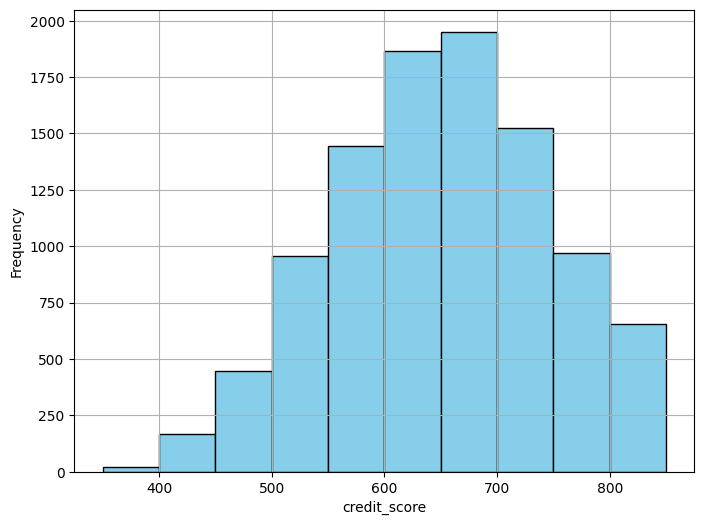

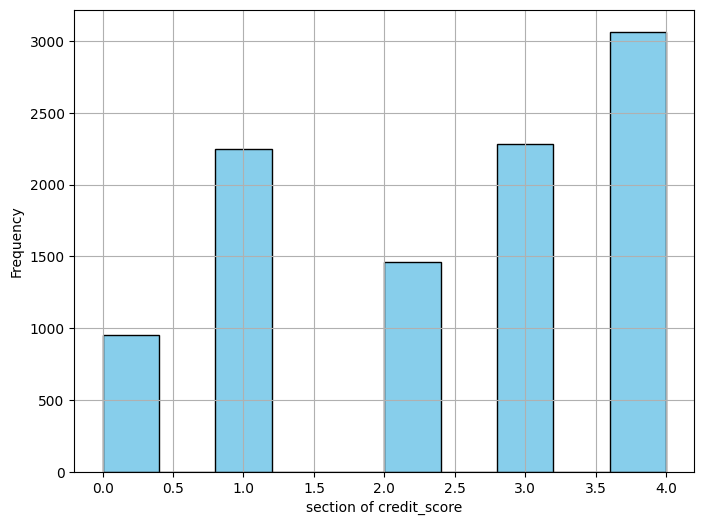

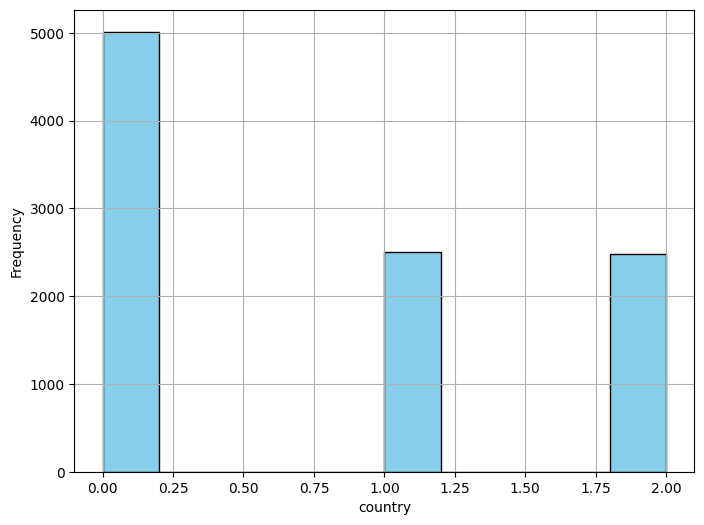

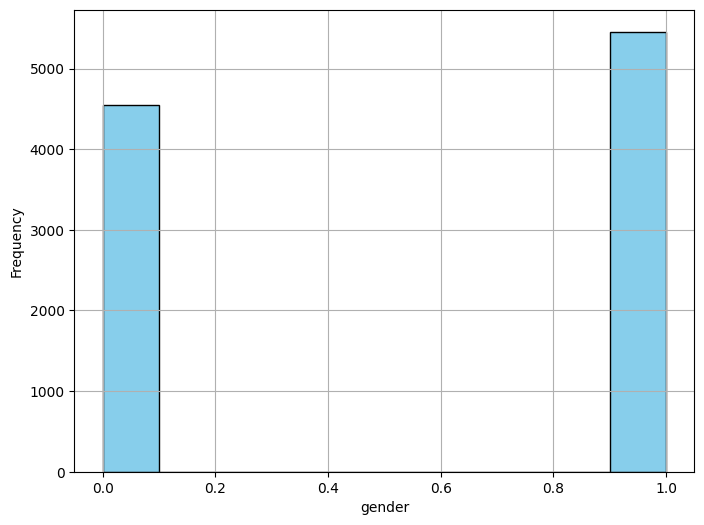

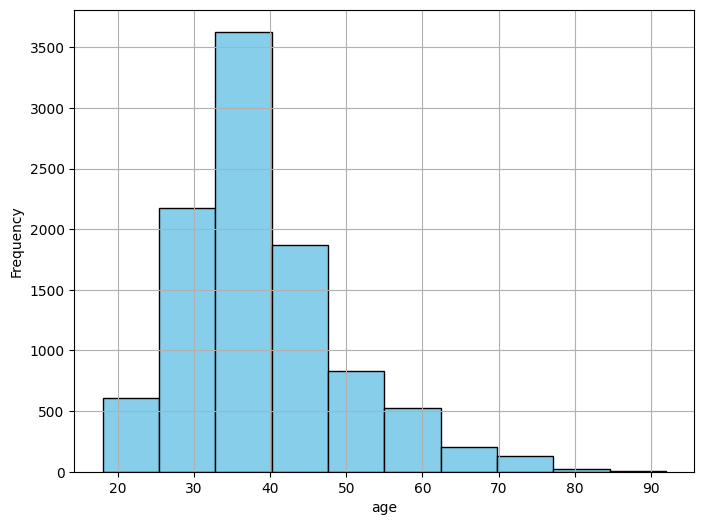

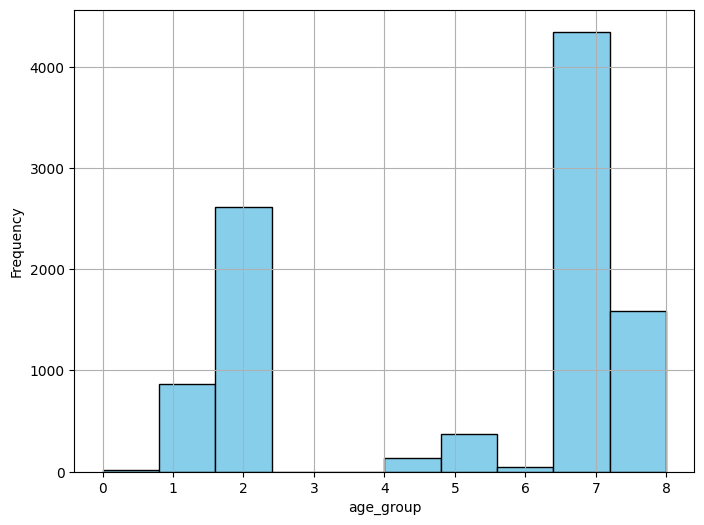

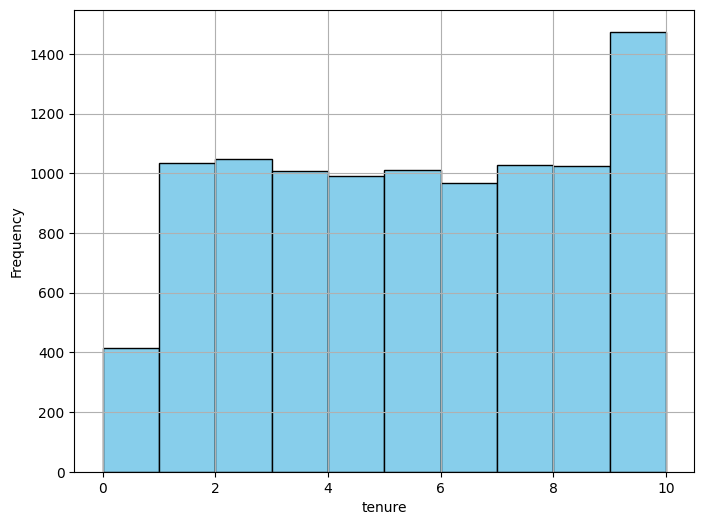

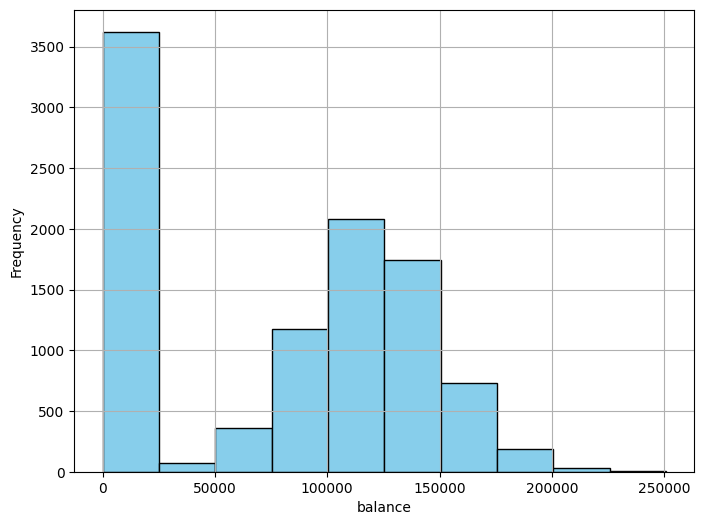

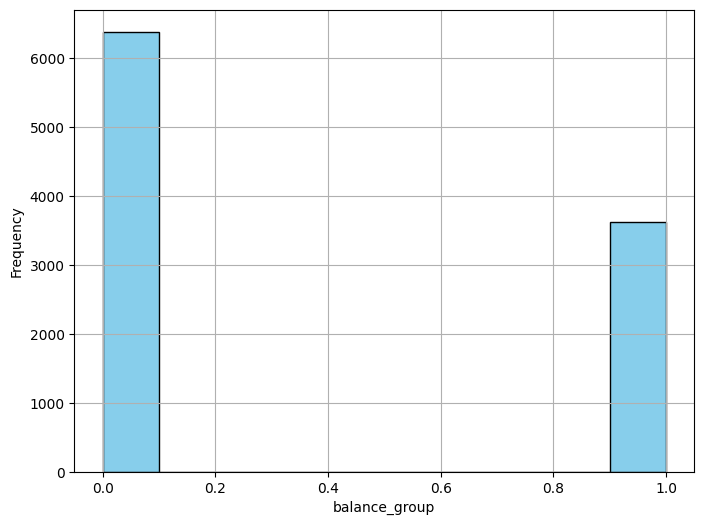

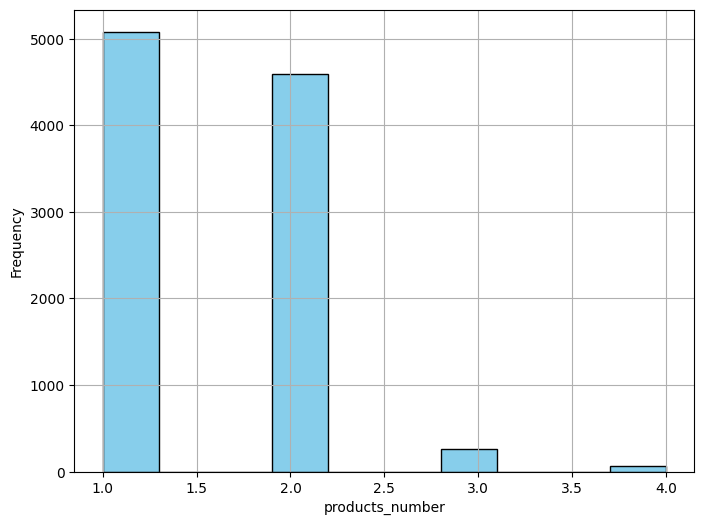

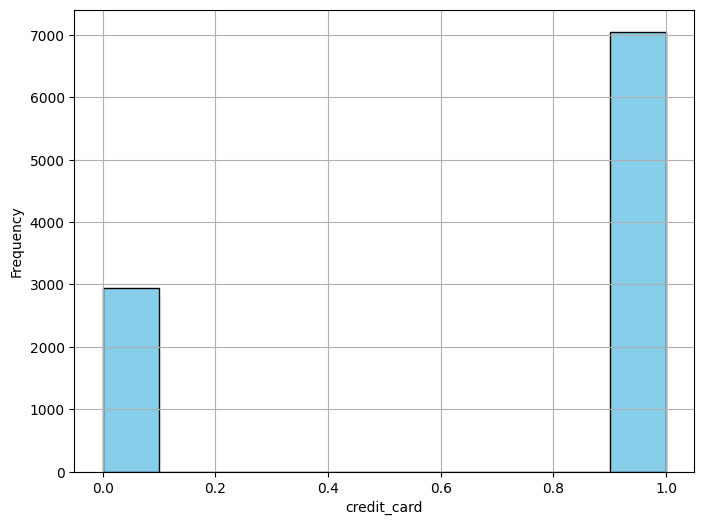

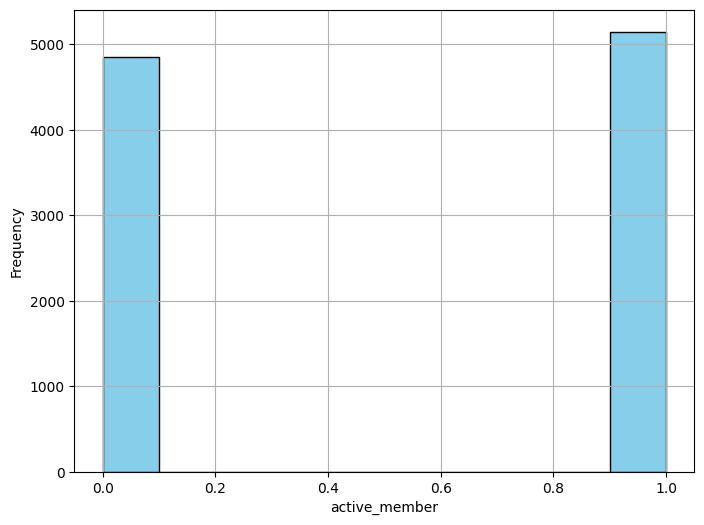

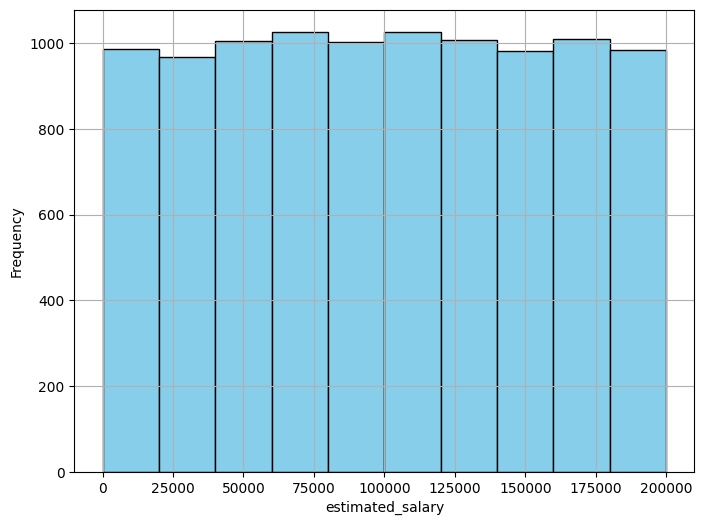

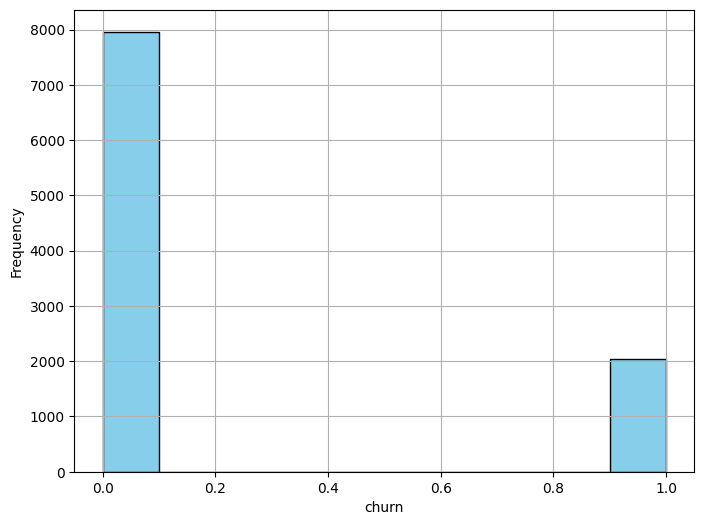

In [ ]:
# 수치형 칼럼만 선택
numeric_columns = df.select_dtypes(include=['number'])

import matplotlib.pyplot as plt

# 각 수치형 칼럼에 대해 히스토그램 그리기
for col in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    numeric_columns[col].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    # plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# 각 칼럼에서 값이 0인 것의 개수 세기
zero_counts = numeric_columns.apply(lambda x: (x == 0).sum())

print("\nCount of zeros in each column:")
print(zero_counts)



Count of zeros in each column:
credit_score                  0
section of credit_score     950
country                    5014
gender                     4543
age                           0
age_group                    13
tenure                      413
balance                    3617
balance_group              6383
products_number               0
credit_card                2945
active_member              4849
estimated_salary              0
churn                      7963
dtype: int64


In [ ]:
# 이상치는 없고 결측치 처리는 balance만 하면 된다
# 근데 결측치가 전체의 약 36퍼센트나 된다

# 데이터의 대표성 왜곡:
# 결측치가 많은 경우, 평균이나 중앙값으로 대체하면 데이터의 대표성이 왜곡될 수 있습니다.
# 데이터의 패턴이나 분포를 충분히 반영하지 못할 수 있습니다.

# 변동성 감소:
# 평균이나 중앙값으로 대체하면 데이터의 변동성이 감소하게 됩니다.
# 이는 실제 데이터의 분포를 왜곡하고 분석 결과에 영향을 미칠 수 있습니다.

# 정보 손실:
# 결측치를 대체할 때 데이터의 원래 정보를 잃을 수 있습니다.
# 특히 결측치가 많은 경우, 대체된 값들이 실제 데이터와 차이가 클 수 있습니다.

In [ ]:
# 데이터프레임에서 특정 값의 행만 선택
filtered_df = df[df['balance_group'] == 'zero']

filtered_df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,balance_group,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
filtered_df.dtypes

credit_score                 int64
section of credit_score      int64
country                      int64
gender                       int64
age                          int64
age_group                    int64
tenure                       int64
balance                    float64
balance_group                int64
products_number              int64
credit_card                  int64
active_member                int64
estimated_salary           float64
churn                        int64
dtype: object

In [ ]:
import pandas as pd

# 수치형 칼럼만 선택
numeric_df = filtered_df.select_dtypes(include=['number'])
numeric_df

,credit_score,section of credit_score,country,gender,age,age_group,tenure,balance,balance_group,products_number,credit_card,active_member,estimated_salary,churn


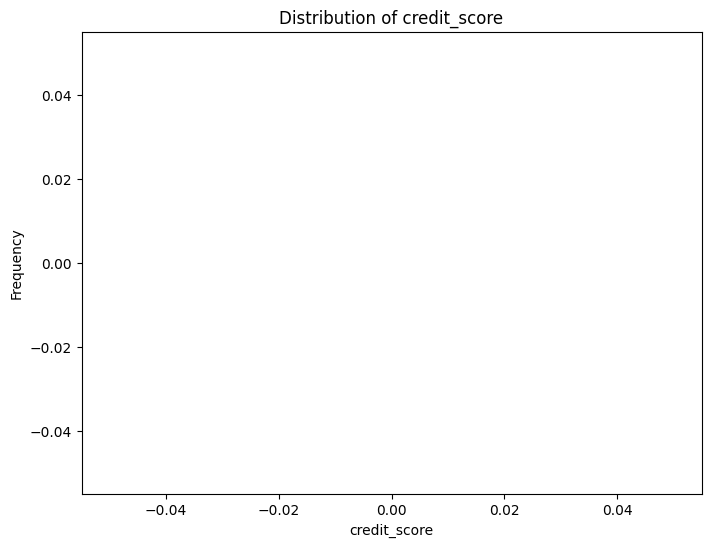

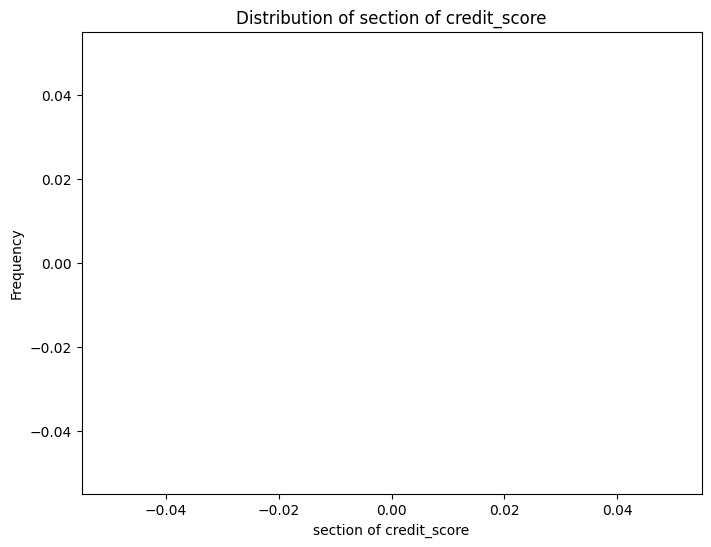

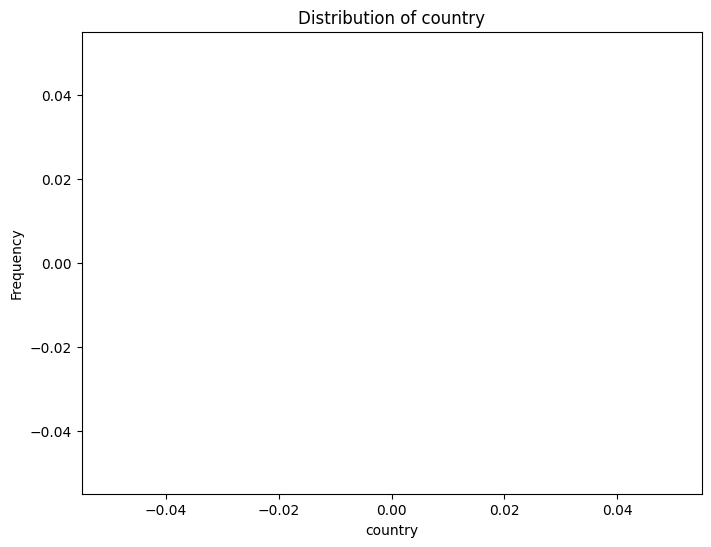

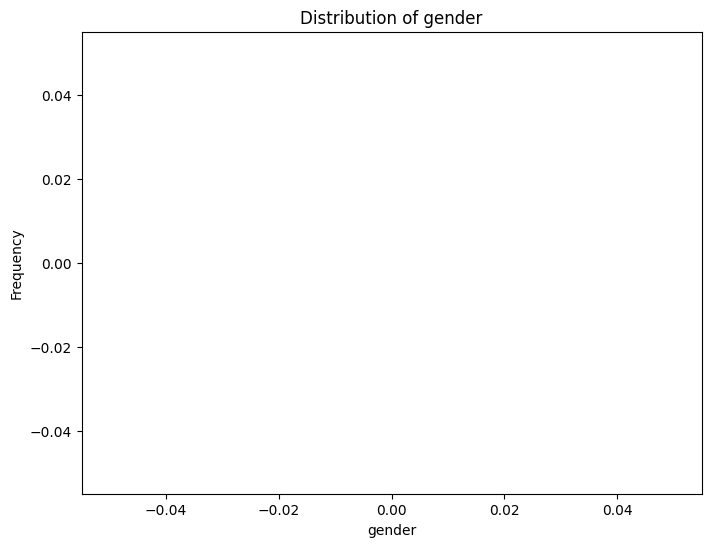

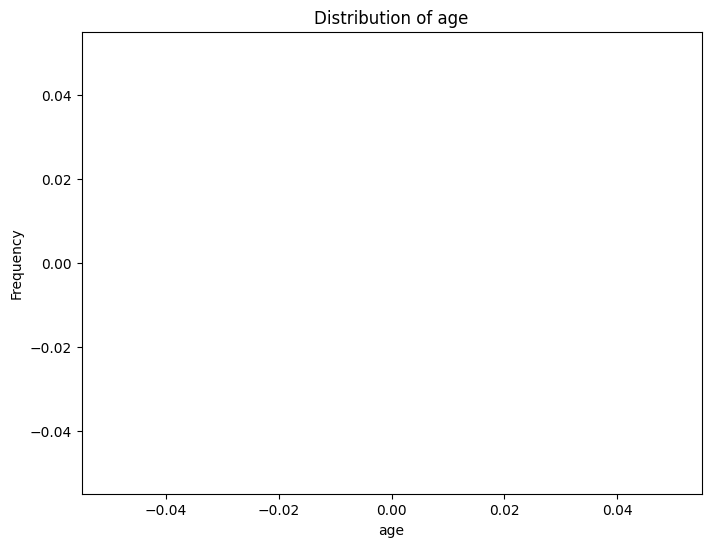

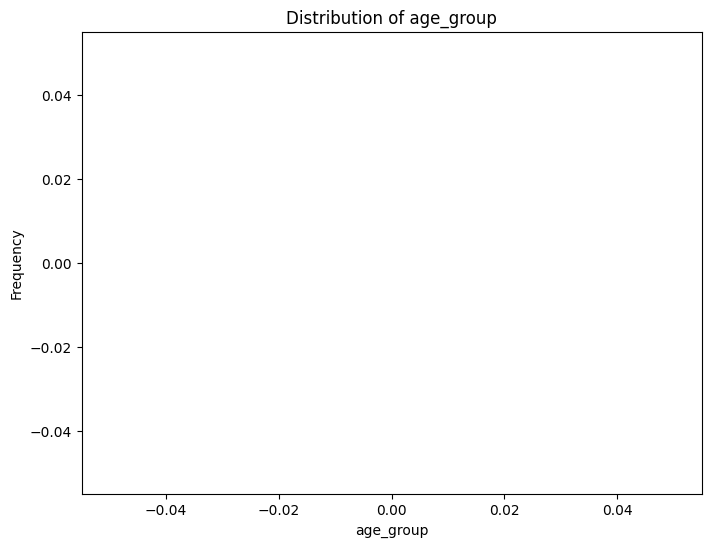

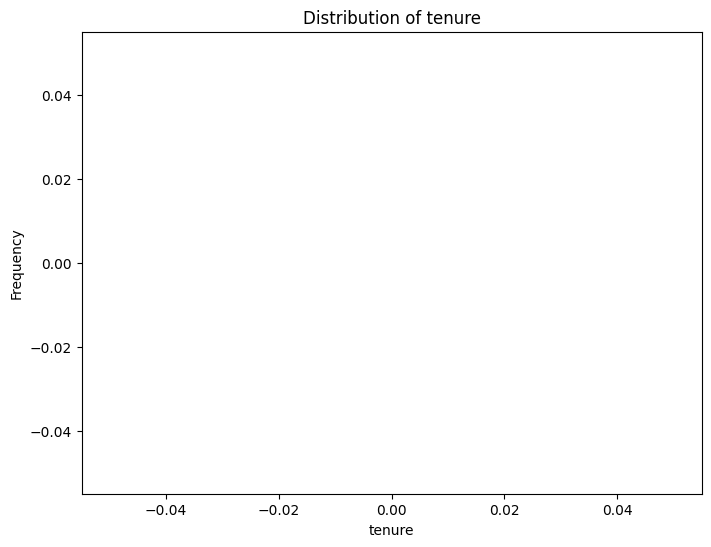

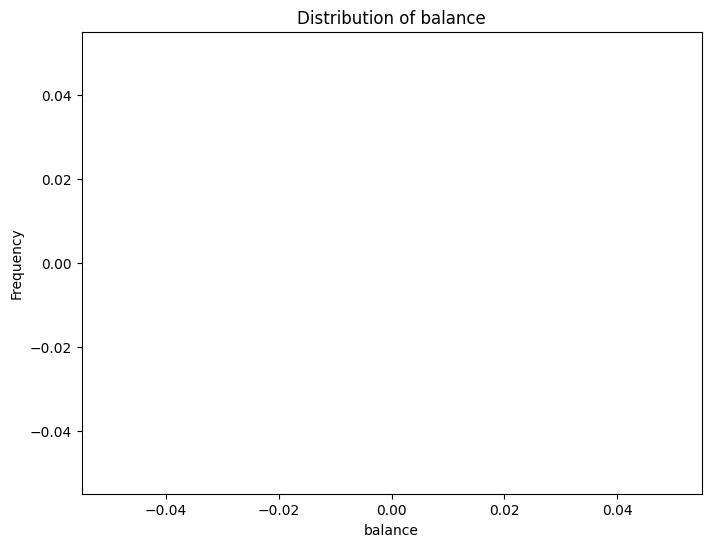

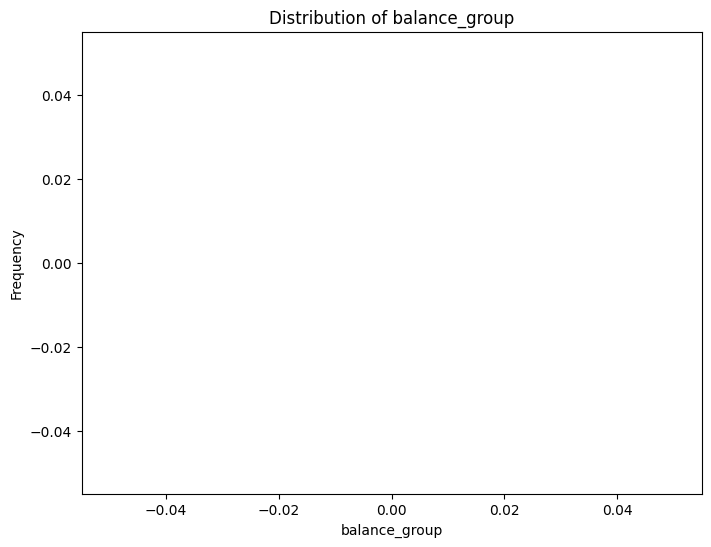

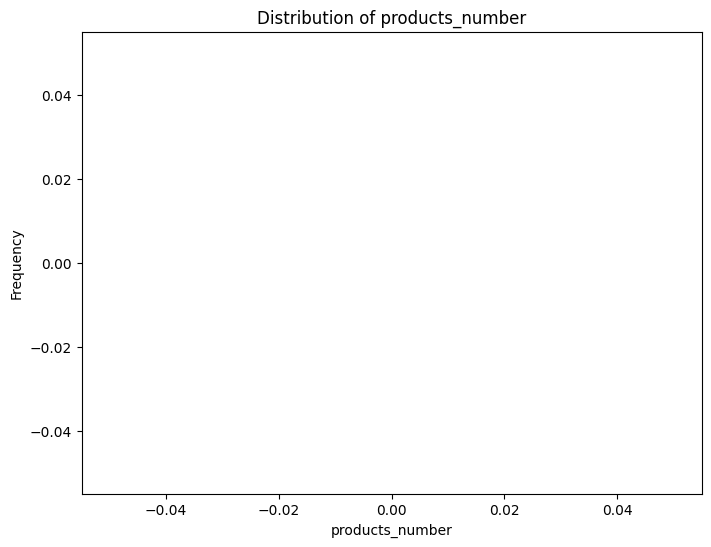

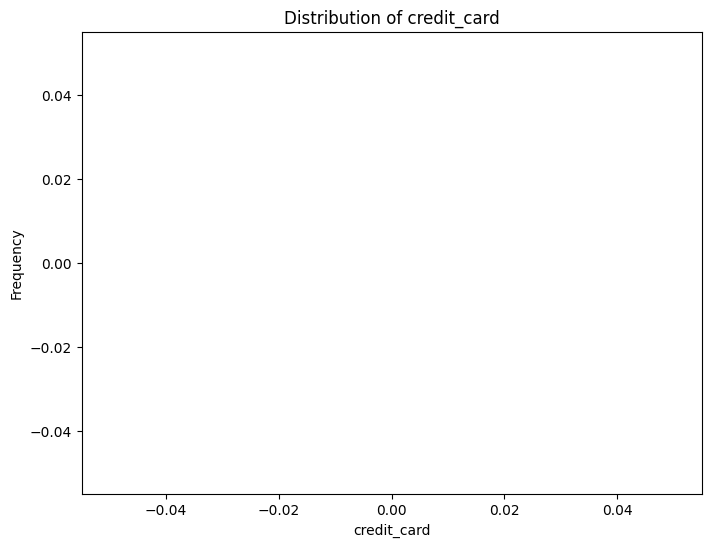

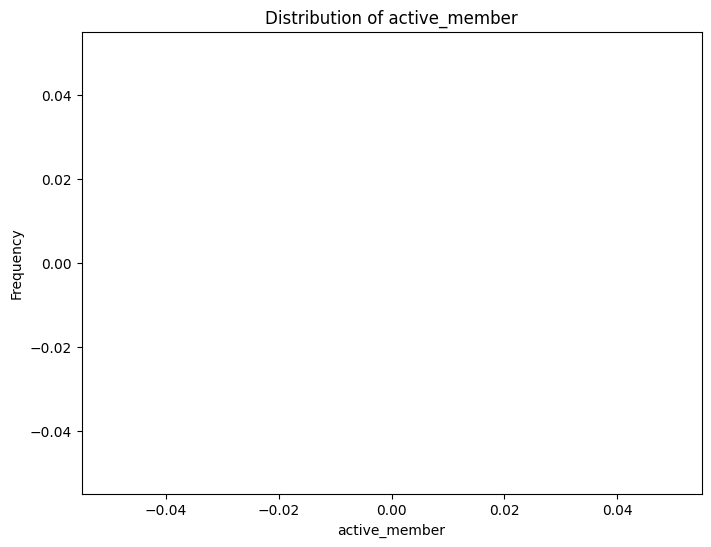

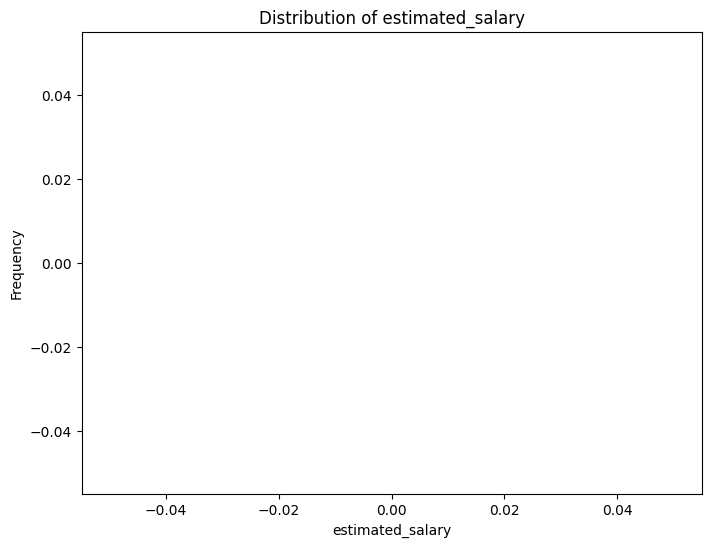

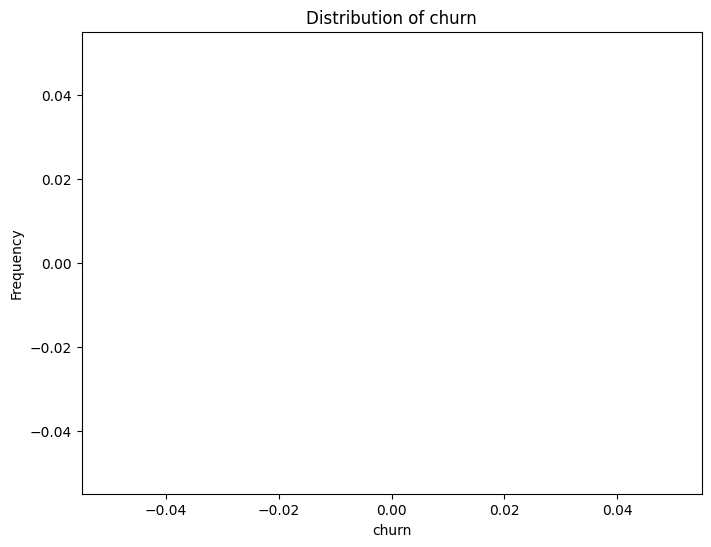

In [ ]:
# 수치형 칼럼만 선택
numeric_df = filtered_df.select_dtypes(include=['number'])

# 각 수치형 칼럼에 대해 히스토그램을 개별적으로 플로팅
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_df[column], kde=True, bins=10)
    plt.title(f'Distribution of {column}')  # 칼럼명에 따라 제목 설정
    plt.xlabel(column)  # 칼럼명으로 x축 레이블 설정
    plt.ylabel('Frequency')  # y축 레이블 설정
    plt.show()  # 각 플롯을 개별적으로 출력

In [ ]:
# 범주형 칼럼만 선택
categorical_df = filtered_df.select_dtypes(include=['category'])

import seaborn as sns
import matplotlib.pyplot as plt

# 각 범주형 칼럼에 대해 막대 그래프를 개별적으로 플로팅
for column in categorical_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_df[column])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

# 예제 데이터프레임 생성
data = {
    'age': [23, 45, 34, 25, 32, 45, 54, 40, 38, 28],
    'salary': [50000, 60000, 70000, 50000, 60000, 75000, 80000, 90000, 95000, 60000],
    'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male']
}
df = pd.DataFrame(data)

# 범주형 변수 인코딩
label_encoders = {}
for column in ['category', 'gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 엔트로피 계산 함수
def entropy(y):
    proportions = y.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# 정보 이득 계산 함수
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    feature_values = df[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# 각 칼럼에 대한 정보 이득 계산
target = 'category'
for feature in df.columns:
    if feature != target:
        ig = information_gain(df, feature, target)
        print(f'Information Gain of {feature} with respect to {target}: {ig}')


Information Gain of age with respect to category: 1.3709505944546685
Information Gain of salary with respect to category: 1.2954618442383217
Information Gain of gender with respect to category: 0.12451124978365291
